In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [232]:
for i in range(data.shape[0]):
    if data.loc[i, 'price_change'] == -1:
        data.loc[i, 'price_change'] = 0

In [233]:
target = 'price_change'

train = data.sample(frac=0.7, random_state=0)
test = data.drop(train.index).sample(frac=1.0, random_state=0)

y_train = train[target]
x_train = train.drop(columns=target)

y_test = test[target]
x_test = test.drop(columns=target)

In [234]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [235]:
import tensorflow as tf

tf.random.set_seed(0)

modelo = tf.keras.Sequential([
    tf.keras.layers.LSTM(40, input_shape=(1395, 1)),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(2)
])

In [236]:
modelo.compile(optimizer='adam',
               loss='mean_squared_error',
               metrics=['accuracy'])

In [237]:
modelo.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 40)                6720      
                                                                 
 dense_56 (Dense)            (None, 60)                2460      
                                                                 
 dense_57 (Dense)            (None, 60)                3660      
                                                                 
 dense_58 (Dense)            (None, 2)                 122       
                                                                 
Total params: 12,962
Trainable params: 12,962
Non-trainable params: 0
_________________________________________________________________


In [238]:
epoch = 100
historial = modelo.fit(x_train, y_train,
                       validation_data=(x_test, y_test),
                       epochs=epoch)

Epoch 1/100
5/5 [==============================] - 2s 164ms/step - loss: 0.4408 - accuracy: 0.4676 - val_loss: 0.4413 - val_accuracy: 0.5932
Epoch 2/100
5/5 [==============================] - 0s 53ms/step - loss: 0.3428 - accuracy: 0.4820 - val_loss: 0.3198 - val_accuracy: 0.5593
Epoch 3/100
5/5 [==============================] - 0s 49ms/step - loss: 0.2651 - accuracy: 0.5396 - val_loss: 0.2459 - val_accuracy: 0.4746
Epoch 4/100
5/5 [==============================] - 0s 49ms/step - loss: 0.2597 - accuracy: 0.5468 - val_loss: 0.2535 - val_accuracy: 0.5593
Epoch 5/100
5/5 [==============================] - 0s 48ms/step - loss: 0.2548 - accuracy: 0.4532 - val_loss: 0.2709 - val_accuracy: 0.5424
Epoch 6/100
5/5 [==============================] - 0s 49ms/step - loss: 0.2539 - accuracy: 0.4532 - val_loss: 0.2828 - val_accuracy: 0.3390
Epoch 7/100
5/5 [==============================] - 0s 46ms/step - loss: 0.2545 - accuracy: 0.5036 - val_loss: 0.2797 - val_accuracy: 0.4407
Epoch 8/100
5/5 [==

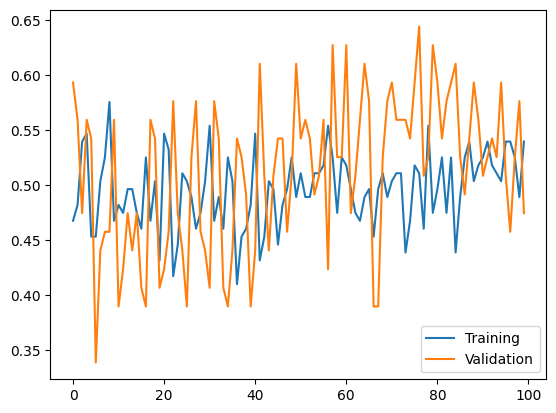

In [239]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']
loss = historial.history['loss']
val_loss = historial.history['val_loss']

plt.plot(range(epoch), acc, label='Training')
plt.plot(range(epoch), val_acc, label='Validation')
plt.legend(loc='lower right')

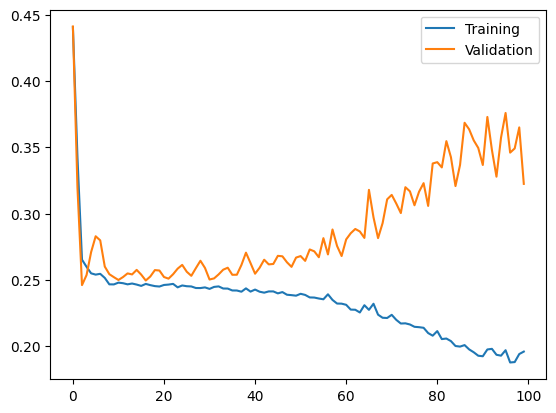

In [240]:
plt.plot(range(epoch), loss, label='Training')
plt.plot(range(epoch), val_loss, label='Validation')
plt.legend(loc='upper right')

2/2 [==============================] - 0s 15ms/step


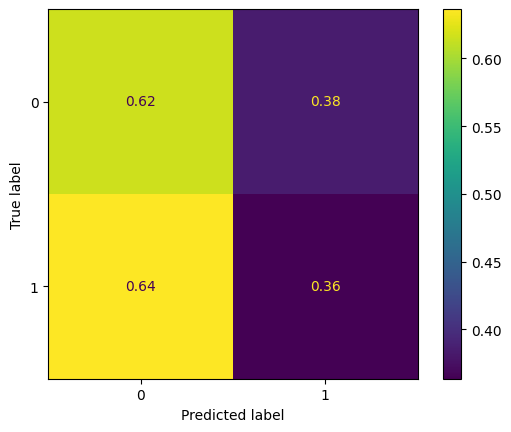

In [241]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = modelo.predict(x_test)
cf = confusion_matrix(y_test, list(map(np.argmax, y_pred)), normalize='true')
ConfusionMatrixDisplay(cf).plot()